In [1]:
import numpy as np
import os
from random import shuffle
from tqdm import tqdm  # Smart progress meter
import matplotlib.pyplot as plt
from PIL import Image
 
# Global Variables
TRAIN_DIR = 'C:/Users/Jamie/Dropbox/College/Year 4/Final Year Project/Python/CREPCHECK/TRAIN'
TEST_DIR = 'C:/Users/Jamie/Dropbox/College/Year 4/Final Year Project/Python/CREPCHECK/TEST'
IMG_SIZE = 120

# Learning Rate
LR = 1e-3

MODEL_NAME = 'AIRFORCE_OR_YEEZY--{}-{}.model'.format(LR, '2conv-basic')

In [2]:
# Set the label using file name
def setImageLabel(img):
    label = img.split('_')[0] # save the string before the underscore
    
    if label == 'AIRFORCE': 
        return [1,0]  # AIRFORCE = 0
    elif label == 'YEEZY': 
        return [0,1]  # YEEZY = 1

In [3]:
def CreateTrainingList():
    trainList = [] # create list to hold the image and label arrays for training
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = setImageLabel(img)
        path = os.path.join(TRAIN_DIR, img)
        
        # Use PIL for image preprocessing
        img = Image.open(path) # Read image syntax
        img = img.convert('L') # Convert to grayscale
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS) # Set images to the same size (120x120)

        trainList.append([np.array(img), np.array(label)])
    shuffle(trainList)
    return trainList

In [4]:
def CreateTestList():
    testList = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR, img)
        imgNum = img.split('_')[1]  # get the number after the underscore just to give each image a unique id

        img = Image.open(path)
        img = img.convert('L') # Convert to grayscale
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        
        testList.append([np.array(img), imgNum])
    shuffle(testList)
    return testList

100%|████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 77.94it/s]


[1 0]


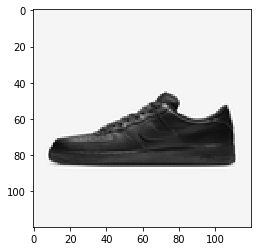

In [5]:
import tensorflow as tf
trainList = CreateTrainingList()
plt.imshow(trainList[34][0], cmap = 'gist_gray')
print(trainList[34][1])
plt.show()

In [6]:
X =[]
Y = []

for features, label in trainList:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y = np.array(Y)

np.save('trainImg.npy', X)
np.save('TrainLabel.npy', Y)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Activation, MaxPooling2D, Dense

# Load training data
TrainingImg = np.load('trainImg.npy', allow_pickle=True)
TrainingLabel = np.load('TrainLabel.npy', allow_pickle=True)

TrainingImg = TrainingImg/255.0

# Create the model using Keras
model = Sequential()

# Building the convolutional neural network layers
model.add(Conv2D(128, (5,5), input_shape = X.shape[1:]))
model.add(Activation("tanh"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3)))
model.add(Activation("tanh"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (2,2)))
model.add(Activation("tanh"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation("tanh"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("tanh"))

model.add(Dense(2))
model.add(Activation("softmax"))
          
# Training the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

Using TensorFlow backend.


In [8]:
model.fit(TrainingImg, TrainingLabel, batch_size=40, epochs=10, validation_split=0.1)

Train on 108 samples, validate on 13 samples
Epoch 1/10
108/108 [==============================] - 2s 22ms/step - loss: 0.9017 - accuracy: 0.5741 - val_loss: 0.9027 - val_accuracy: 0.5385
Epoch 2/10
108/108 [==============================] - 0s 4ms/step - loss: 0.8348 - accuracy: 0.4815 - val_loss: 0.8391 - val_accuracy: 0.4615
Epoch 3/10
108/108 [==============================] - 0s 4ms/step - loss: 0.7388 - accuracy: 0.5185 - val_loss: 0.7071 - val_accuracy: 0.5385
Epoch 4/10
108/108 [==============================] - 0s 4ms/step - loss: 0.6706 - accuracy: 0.5926 - val_loss: 0.7112 - val_accuracy: 0.5385
Epoch 5/10
108/108 [==============================] - 0s 3ms/step - loss: 0.6330 - accuracy: 0.6204 - val_loss: 0.7191 - val_accuracy: 0.5385
Epoch 6/10
108/108 [==============================] - 0s 3ms/step - loss: 0.6490 - accuracy: 0.6019 - val_loss: 0.6617 - val_accuracy: 0.6923
Epoch 7/10
108/108 [==============================] - 0s 4ms/step - loss: 0.5668 - accuracy: 0.7500 - 

 13%|██████████▊                                                                        | 6/46 [00:00<00:00, 56.55it/s]c:\users\jamie\appdata\local\programs\python\python37\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|█████████████████████████████████████████████████████████████████████████████████| 46/46 [00:00<00:00, 101.01it/s]


[0.04968135 0.95031863]
[0.16130598 0.838694  ]
[0.07589672 0.9241033 ]
[0.6416411  0.35835895]
[0.5726004 0.4273996]
[0.30142996 0.6985701 ]
[0.01820447 0.9817955 ]
[0.48225328 0.51774675]
[0.05758263 0.9424174 ]
[0.651401   0.34859902]
[0.56073457 0.4392655 ]
[0.543646   0.45635402]
[0.00941413 0.99058586]
[0.16244082 0.83755916]
[0.05074798 0.94925195]


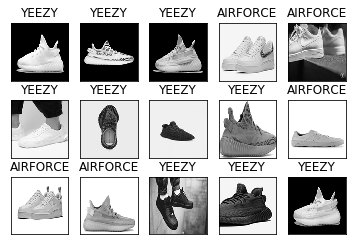

In [9]:
testList = CreateTestList()
fig = plt.figure()

for num, data in enumerate(testList[:15]):
    img_num = data[1]
    img_data = data[0]
    y = fig.add_subplot(3,5,num+1)
    orig = img_data
    new = img_data.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    prediction = model.predict(new)[0]
    print(prediction)
    if np.argmax(prediction) == 1:
        str_label = 'YEEZY'
    else:
        str_label = 'AIRFORCE'
    
    y.imshow(orig, cmap = 'gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

In [10]:
model.save(MODEL_NAME)